# Sommaire

- [1. Importation des packages](#1-importation-des-packages)
- [2. Importation des données](#2-importation-des-données)
- [3. Affichage des données](#3-affichage-des-données)
- [4. Etude du jeu de données](#4-etude-du-jeu-de-données)
  - [Partie graphique](#partie-graphique)
    - [a. Affichage de la quantité de chaque catégorie](#a-affichage-de-la-quantité-de-chaque-catégorie)
    - [b. Affichage du nombre de mots fréquents par catégories](#b-affichage-du-nombre-de-mots-fréquents-par-catégories)
    - [c. Génération des nuages de mots pour chaque catégorie](#c-génération-des-nuages-de-mots-pour-chaque-catégorie)
    - [d. Comparaison des commentaires](#d-comparaison-des-commentaires)
- [5. Préparation des données](#5-préparation-des-données)
  - [a. Téléchargement des packages](#a-téléchargement-des-packages)
  - [b. Nettoyage des données](#b-nettoyage-des-données)
  - [c. Lemmatization et Stopwords](#c-lemmatization-et-stopwords)
  - [d. Tokenization](#d-tokenization)
  - [e. Padding](#padding)
- [6. Préparation de notre pipeline](#6-préparation-de-notre-pipeline)
- [7. Entraînement du modèle baseline](#7-entraînement-du-modèle-baseline)
  - [a. Construction du modèle Bidirectionnel LSTM](#construction-du-modèle-bidirectionnel-lstm)
  - [b. Affichage des courbes Loss et accuracy](#affichage-des-courbes-loss-et-accuracy)
  - [c. Construction du modèle CNN](#construction-du-modèle-cnn)
  - [d. Affichage des courbes Loss et accuracy](#affichage-des-courbes-loss-et-accuracy-1)
  - [e. Construction du modèle GRU](#construction-du-modèle-gru)
  - [f. Affichage des courbes Loss et accuracy](#affichage-des-courbes-loss-et-accuracy-2)
- [8. Itération de la modélisation](#8-itération-de-la-modélisation)
  - [a. Généralisation des modèles sur différents commentaires](#a-généralisation-des-modèles-sur-différents-commentaires)


# 1/ Importation des packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# 2/ Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 3/ Affichage des données

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# 4/ Etude du jeu de données

Tout d'abord, il peut être intéressant de voir le nombre de commentaires négatifs selon leurs catégories ainsi que d'autres statistiques:


In [ ]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ensuite, on peut également observer le nombre de mots par commentaire.
On peut remarquer ici qu'il y a moins de 1000 mots dans la plupart des cas, on peut donc se dire qu'on travaille qu'avec les commentaires de moins de 1000 mots:

### Partie graphique

## a) Affichage de la quantité de chaque catégorie

(array([126021.,  20285.,   6626.,   2605.,   1200.,    736.,    569.,
           490.,    397.,    642.]),
 array([   6. ,  505.4, 1004.8, 1504.2, 2003.6, 2503. , 3002.4, 3501.8,
        4001.2, 4500.6, 5000. ]),
 <BarContainer object of 10 artists>)

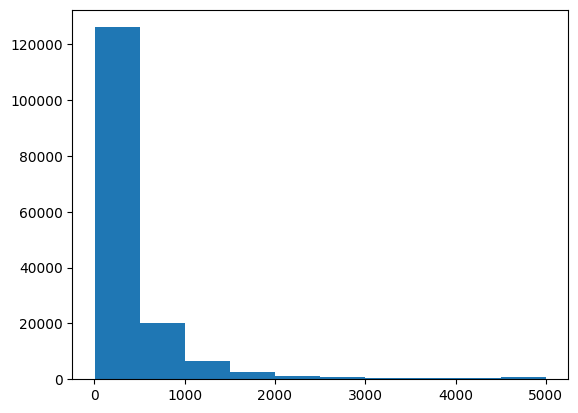

In [ ]:
comment=data.comment_text.str.len()
plt.hist(comment)

On peut également voir la quantité de chaque catégorie graphiquement.
On remarque que severe_toxic pourrait potentiellement être regroupé avec toxic vu la quantité faible qu'il y a.

## b) Affichage du nombre de mots fréquents par catégories



<Axes: >

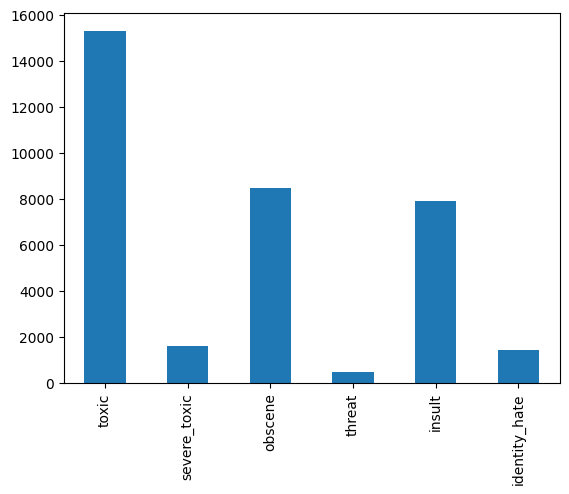

In [ ]:
train_labels = data[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()

label_count.plot(kind="bar")
#il y a + de toxic qu'autre chose
#regrouper severe toxic et toxic? car pas bcp de severe_toxic

On peut s'amuser à afficher les mots qui reviennent le plus selon les catégories (âmes sensibles s'abstenir):

## c) Génération des nuages de mots pour chaque catégorie


In [ ]:
#pip install wordcloud matplotlib pandas

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Supposons que 'data' est votre DataFrame et qu'il contient une colonne 'text'
# et des colonnes de labels comme 'toxic', 'severe_toxic', etc.

def generate_wordcloud(data, category):
    # Combine tous les textes de la catégorie donnée
    text = " ".join(review for review in data[data[category]==1].comment_text)

    # Génère un WordCloud
    wordcloud = WordCloud(background_color="white").generate(text)

    # Affiche le WordCloud
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud pour la catégorie: {category}")
    plt.show()


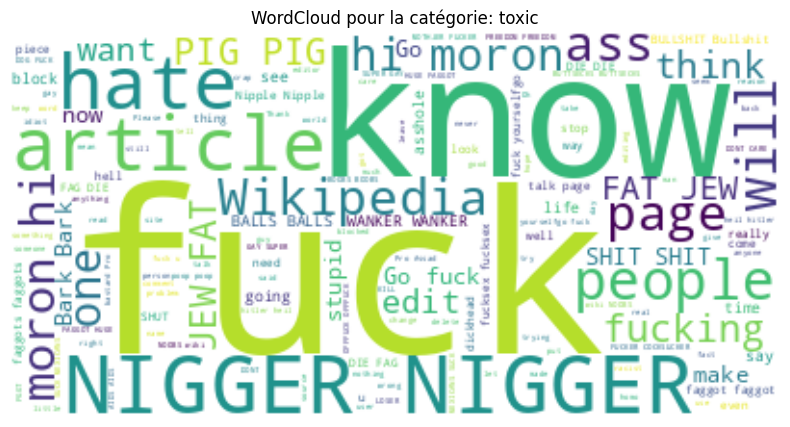

In [ ]:
generate_wordcloud(data, 'toxic')

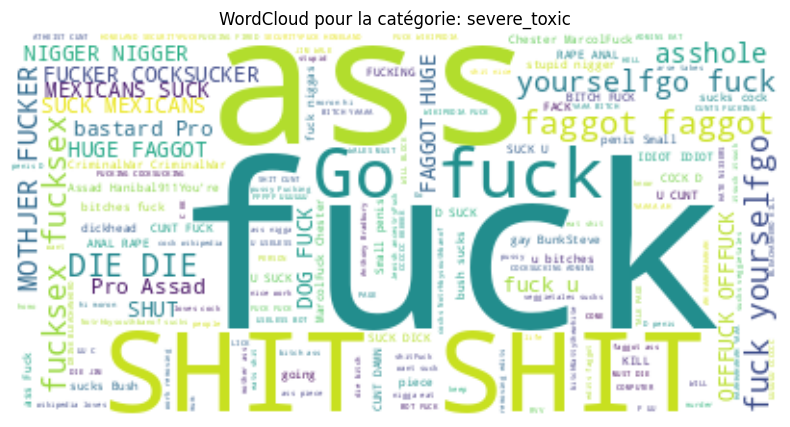

In [ ]:
generate_wordcloud(data, 'severe_toxic')

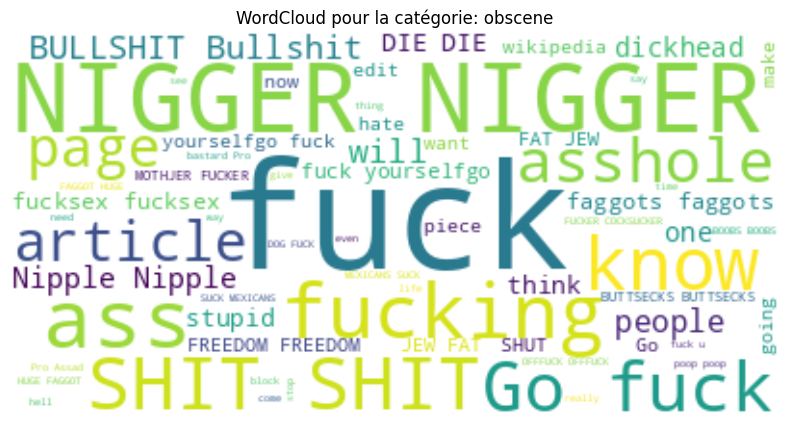

In [ ]:
generate_wordcloud(data, 'obscene')

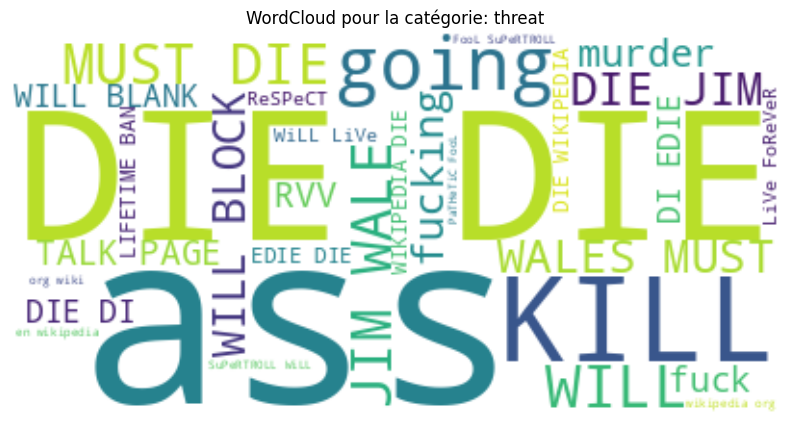

In [ ]:
generate_wordcloud(data, 'threat')

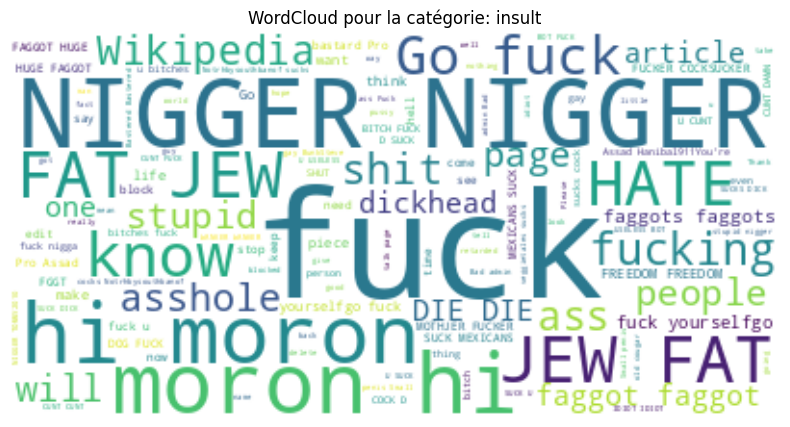

In [ ]:
generate_wordcloud(data, 'insult')

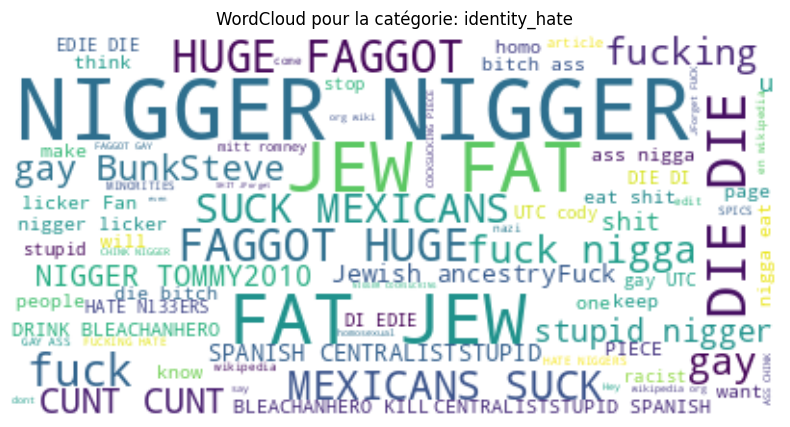

In [ ]:
generate_wordcloud(data, 'identity_hate')

## d) Comparaison des commentaires

Pour finir sur une meilleure note, on peut remarquer que la plupart des commentaires sont positifs, et que ceux négatifs représentent seulement une petite partie:

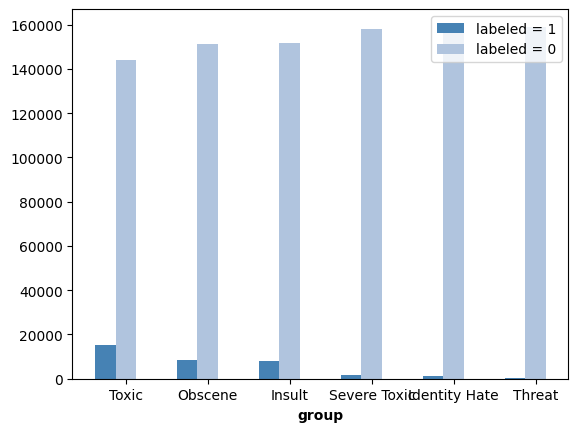

In [ ]:
# Code to draw bar graph for visualising distribution of classes within each label.
# Compare negative and the rest of the comments
barWidth = 0.25

bars1 = [sum(data['toxic'] == 1), sum(data['obscene'] == 1), sum(data['insult'] == 1), sum(data['severe_toxic'] == 1),
         sum(data['identity_hate'] == 1), sum(data['threat'] == 1)]
bars2 = [sum(data['toxic'] == 0), sum(data['obscene'] == 0), sum(data['insult'] == 0), sum(data['severe_toxic'] == 0),
         sum(data['identity_hate'] == 0), sum(data['threat'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='steelblue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate',
                                                       'Threat'])
plt.legend()
plt.show()

# 5/ Préparation des données

On va pouvoir désormais pré-traiter nos données:

D'abord importons nos librairies:

## a) Téléchargement des packages

In [ ]:
# Your Code
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import re
import nltk

Nous avons trouvé quelqu'un qui a résolu le problème qui a fait ce dictionnaire en utilisant regex qu'on réutilisera pour nous faciliter la tâche.

In [ ]:
RE_PATTERNS = {
    ' american ':
        [
            'amerikan'
        ],

    ' adolf ':
        [
            'adolf'
        ],


    ' hitler ':
        [
            'hitler'
        ],

    ' fuck':
        [
            '(f)(u|[^a-z0-9 ])(c|[^a-z0-9 ])(k|[^a-z0-9 ])([^ ])*',
            '(f)([^a-z]*)(u)([^a-z]*)(c)([^a-z]*)(k)',
            ' f[!@#\$%\^\&\*]*u[!@#\$%\^&\*]*k', 'f u u c',
            '(f)(c|[^a-z ])(u|[^a-z ])(k)', r'f\*',
            'feck ', ' fux ', 'f\*\*', 'f**k','fu*k',
            'f\-ing', 'f\.u\.', 'f###', ' fu ', 'f@ck', 'f u c k', 'f uck', 'f ck'
        ],

    ' ass ':
        [
            '[^a-z]ass ', '[^a-z]azz ', 'arrse', ' arse ', '@\$\$',
            '[^a-z]anus', ' a\*s\*s', '[^a-z]ass[^a-z ]',
            'a[@#\$%\^&\*][@#\$%\^&\*]', '[^a-z]anal ', 'a s s','a55', '@$$'
        ],

    ' ass hole ':
        [
            ' a[s|z]*wipe', 'a[s|z]*[w]*h[o|0]+[l]*e', '@\$\$hole', 'a**hole'
        ],

    ' bitch ':
        [
            'b[w]*i[t]*ch', 'b!tch',
            'bi\+ch', 'b!\+ch', '(b)([^a-z]*)(i)([^a-z]*)(t)([^a-z]*)(c)([^a-z]*)(h)',
            'biatch', 'bi\*\*h', 'bytch', 'b i t c h', 'b!tch', 'bi+ch', 'l3itch'
        ],

    ' bastard ':
        [
            'ba[s|z]+t[e|a]+rd'
        ],

    ' trans gender':
        [
            'transgender'
        ],

    ' gay ':
        [
            'gay'
        ],

    ' cock ':
        [
            '[^a-z]cock', 'c0ck', '[^a-z]cok ', 'c0k', '[^a-z]cok[^aeiou]', ' cawk',
            '(c)([^a-z ])(o)([^a-z ]*)(c)([^a-z ]*)(k)', 'c o c k'
        ],

    ' dick ':
        [
            ' dick[^aeiou]', 'deek', 'd i c k', 'dik'
        ],

    ' suck ':
        [
            'sucker', '(s)([^a-z ]*)(u)([^a-z ]*)(c)([^a-z ]*)(k)', 'sucks', '5uck', 's u c k'
        ],

    ' cunt ':
        [
            'cunt', 'c u n t'
        ],

    ' bull shit ':
        [
            'bullsh\*t', 'bull\$hit'
        ],

    ' homo sex ual':
        [
            'homosexual'
        ],

    ' jerk ':
        [
            'jerk'
        ],

    ' idiot ':
        [
            'i[d]+io[t]+', '(i)([^a-z ]*)(d)([^a-z ]*)(i)([^a-z ]*)(o)([^a-z ]*)(t)', 'idiots'
                                                                                      'i d i o t'
        ],

    ' dumb ':
        [
            '(d)([^a-z ]*)(u)([^a-z ]*)(m)([^a-z ]*)(b)'
        ],

    ' shit ':
        [
            'shitty', '(s)([^a-z ]*)(h)([^a-z ]*)(i)([^a-z ]*)(t)', 'shite', '\$hit', 's h i t', '$h1t'
        ],

    ' shit hole ':
        [
            'shythole'
        ],

    ' retard ':
        [
            'returd', 'retad', 'retard', 'wiktard', 'wikitud'
        ],

    ' rape ':
        [
            ' raped'
        ],

    ' dumb ass':
        [
            'dumbass', 'dubass'
        ],

    ' ass head':
        [
            'butthead'
        ],

    ' sex ':
        [
            'sexy', 's3x', 'sexuality'
        ],


    ' nigger ':
        [
            'nigger', 'ni[g]+a', ' nigr ', 'negrito', 'niguh', 'n3gr', 'n i g g e r'
        ],

    ' shut the fuck up':
        [
            'stfu', 'st*u'
        ],

    ' pussy ':
        [
            'pussy[^c]', 'pusy', 'pussi[^l]', 'pusses', 'p*ssy'
        ],

    ' faggot ':
        [
            'faggot', ' fa[g]+[s]*[^a-z ]', 'fagot', 'f a g g o t', 'faggit',
            '(f)([^a-z ]*)(a)([^a-z ]*)([g]+)([^a-z ]*)(o)([^a-z ]*)(t)', 'fau[g]+ot', 'fae[g]+ot',
        ],

    ' mother fucker':
        [
            ' motha ', ' motha f', ' mother f', 'motherucker',
        ],

    ' whore ':
        [
            'wh\*\*\*', 'w h o r e'
        ],
    ' fucking ':
        [
            'f*$%-ing'
        ],
}

## b) Nettoyage des données

Maintenant nettoyons nos données:

In [ ]:
def clean_text(text):

  text=text.lower()

  for target, patterns in RE_PATTERNS.items():
    for pat in patterns:
      text=str(text).replace(pat, target)

  text = re.sub(r'(.)\1{2,}', r'\1', text)

  # Replacing newline characters with spaces
  text = str(text).replace("\n", " ")

  # Removing any non-alphanumeric characters (except spaces)
  text = re.sub(r'[^\w\s]',' ',text)

  # Removing any numbers
  text = re.sub('[0-9]',"",text)

  # Removing any extra spaces
  text = re.sub(" +", " ", text)

  # Removing any non-ASCII characters
  text = re.sub("([^\x00-\x7F])+"," ",text)

  return text

On va préparer la lemmatization et enlever les stopwords.

## c) Lemmatization et Stopwords

In [ ]:
# Initialize NLTK objects
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Define a function to preprocess the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    preprocessed_text = " ".join(lemmatized_tokens)

    return preprocessed_text



In [ ]:
# Apply the preprocessing function to the 'comment_text' column
data['comment_text'] = data['comment_text'].apply(preprocess_text)

In [ ]:
data['comment_text'][3]

"`` ca n't make real suggestion improvement - wondered section statistic later , subsection `` '' type accident '' '' -i think reference may need tidying exact format ie date format etc . later , no-one else first - preference formatting style reference want please let know . appears backlog article review guess may delay reviewer turn . 's listed relevant form eg wikipedia : good_article_nominations # transport ``"

## d) Tokenization

Nous allons maintenant faire le tokenizer pour transformer les mots en vecteurs:

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['comment_text'].values) #keras function that fit according to data's frequency

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index)
print("Words in Vocabulary: ",vocab_size)

Words in Vocabulary:  186918


In [ ]:
list_tokenized = tokenizer.texts_to_sequences(data['comment_text'].values) #we can now convert the text in vectors

## e) Padding

Maintenant nous allons faire le padding, nécessaire pour certains modèles de type RNN ou transformers(on va prendre 500 mots max car on a vu que la plupart est inférieur à 500):

In [ ]:
max_length=500
X_train = pad_sequences(list_tokenized, maxlen=max_length, padding = 'post')
Y_train = data[data.columns[2:]].values #this way we only get the values and not names of columns

# 6/ Préparation de notre pipeline


In [ ]:
data_train = tf.data.Dataset.from_tensor_slices((X_train,Y_train))
data_train = data_train.cache()
data_train = data_train.shuffle(160000)
data_train = data_train.batch(32)
data_train = data_train.prefetch(16)
data_train = data_train.take(int(len(data_train)*.05)) #we only take 5% of the data so we reduce the time needed (bad computer)

def convert_to_float32(input, label):
    return tf.cast(input, tf.float32), tf.cast(label, tf.float32)

# Appliquez cette fonction à votre dataset
data_train = data_train.map(convert_to_float32)


# 7/ Entraînement du modèle baseline

## a) Construction du modèle Bidirectionnel LSTM

Importons les librairies importantes:

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding, Conv1D, GlobalMaxPooling1D, GRU

In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
# Create the embedding layer
model.add(Embedding(vocab_size+1, 128))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(128, activation='tanh', dropout = 0.2)))
# Final layer
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics = ['accuracy'])

On va print un résumé du modèle:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         23925632  
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                                 
Total params: 24190342 (92.28 MB)
Trainable params: 24190342 (92.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(data_train)

history = model.fit(data_train,epochs=5)

<_MapDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>
Epoch 1/5
249/249 [==============================] - 39s 126ms/step - loss: 0.1466 - accuracy: 0.9744
Epoch 2/5
249/249 [==============================] - 23s 91ms/step - loss: 0.0719 - accuracy: 0.9936
Epoch 3/5
249/249 [==============================] - 20s 79ms/step - loss: 0.0645 - accuracy: 0.9933
Epoch 4/5
249/249 [==============================] - 18s 70ms/step - loss: 0.0562 - accuracy: 0.9946
Epoch 5/5
249/249 [==============================] - 16s 64ms/step - loss: 0.0536 - accuracy: 0.9949


# b) Affichage des courbes Loss et accuracy

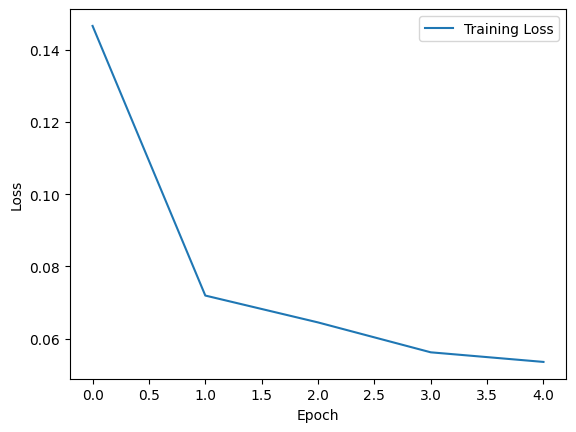

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

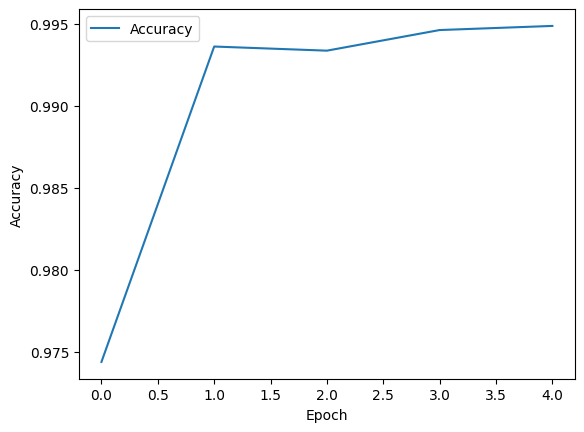

In [ ]:
# Plot the accuracy score on the training set
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# c) Construction du modèle CNN

In [ ]:
model_cnn = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Couche d'embedding
    Conv1D(128, 5, activation='relu'),  # Couche convolutive
    GlobalMaxPooling1D(),  # Réduction de dimension
    Dense(128, activation='relu'),  # Couche dense supplémentaire
    Dense(6, activation='sigmoid')  # Couche de sortie
])
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history_cnn = model_cnn.fit(data_train, epochs=8)

Epoch 1/8
249/249 [==============================] - 28s 100ms/step - loss: 0.1572 - accuracy: 0.8670
Epoch 2/8
249/249 [==============================] - 15s 61ms/step - loss: 0.0637 - accuracy: 0.9926
Epoch 3/8
249/249 [==============================] - 12s 49ms/step - loss: 0.0568 - accuracy: 0.9739
Epoch 4/8
249/249 [==============================] - 10s 41ms/step - loss: 0.0566 - accuracy: 0.9871
Epoch 5/8
249/249 [==============================] - 7s 28ms/step - loss: 0.0537 - accuracy: 0.9935
Epoch 6/8
249/249 [==============================] - 7s 26ms/step - loss: 0.0535 - accuracy: 0.9945
Epoch 7/8
249/249 [==============================] - 5s 20ms/step - loss: 0.0519 - accuracy: 0.9936
Epoch 8/8
249/249 [==============================] - 6s 24ms/step - loss: 0.0503 - accuracy: 0.9945


# d) Affichage des courbes Loss et accuracy

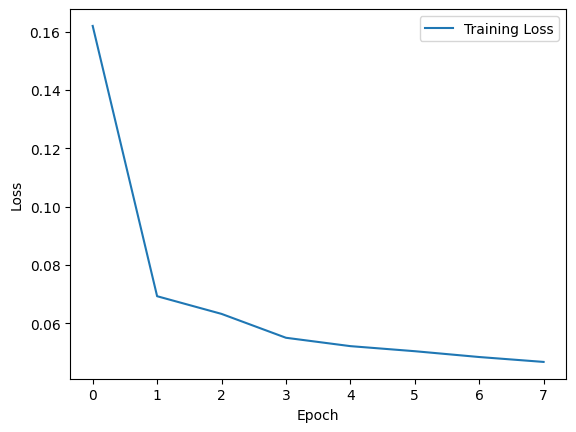

In [ ]:
# Plot the loss
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

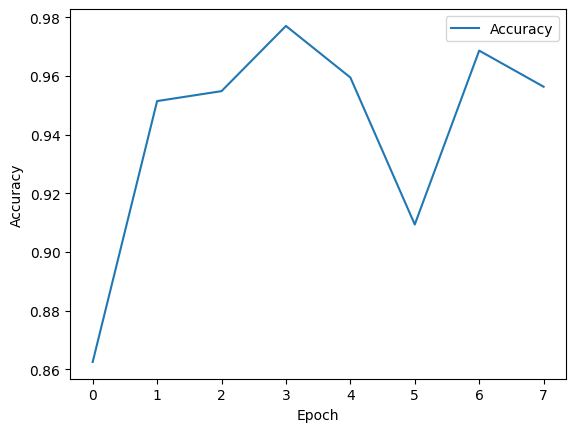

In [ ]:
# Plot the accuracy score on the training set
plt.plot(history_cnn.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# e) Construction du modèle GRU

In [ ]:
model_gru = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Couche d'embedding
    GRU(128, return_sequences=True),  # GRU
    Dropout(0.2), #Il avait overfit donc on a ajouté du dropout
    GRU(64),  # Deuxième couche GRU
    Dropout(0.2),
    Dense(64, activation='relu'),  # Dense supplémentaire
    Dropout(0.2),
    Dense(6, activation='sigmoid')  # Couche de sortie
])

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model_gru.summary())

# Entraînement du modèle
history_gru = model_gru.fit(data_train, epochs=8)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 128)          23925504  
                                                                 
 gru_4 (GRU)                 (None, 500, 128)          99072     
                                                                 
 dropout_3 (Dropout)         (None, 500, 128)          0         
                                                                 
 gru_5 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)               

# f) Affichage des courbes Loss et accuracy

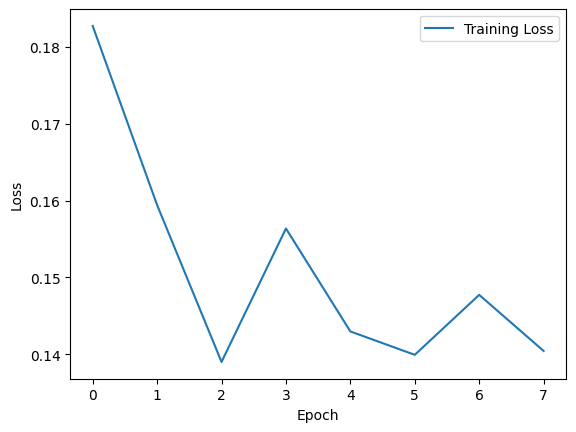

In [ ]:
# Plot the loss
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

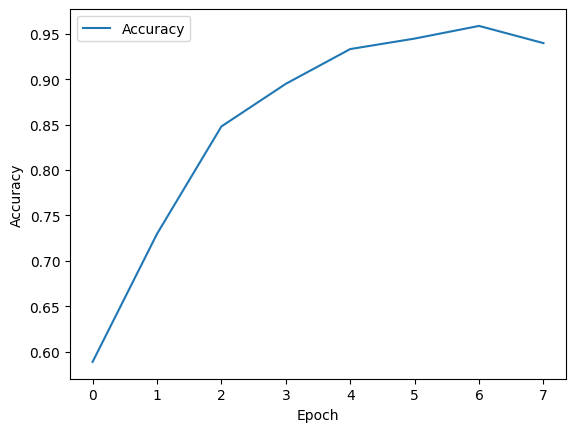

In [ ]:
# Plot the accuracy score on the training set
plt.plot(history_gru.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 8/ Itération de la modélisation

In [ ]:
# Your Code
def prepare_and_predict(text, model_chosen, tokenizer, max_length):
    # Nettoyage et prétraitement du texte
    print("For the sentence: ", text) #we show the sentence before cleaning it
    text = clean_text(text)
    text = preprocess_text(text)  #cleaning and preprocessing like before

    # Converting to sequences
    sequence = tokenizer.texts_to_sequences([text])

    # Padding to get the same length
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

    # Prediction
    prediction = model_chosen.predict(padded_sequence)
    labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    for idx, label in enumerate(labels):
        print(f"{label}: {prediction[0][idx]}")
    print("")


## a) Généralisation des modèles sur différents commentaires

Voici 3 phrases types pour tester nos modèles:

In [ ]:
non_toxic_comment="hello nice to meet you"
hateful_comment="I hate your website it sucks"
really_hateful_comment="Fuck you what is this bullshit, nig***" #désolé il nous faut des mots forts pour tester

Testons sur le modèle Binary LSTM:

In [ ]:
prepare_and_predict(non_toxic_comment, model, tokenizer, max_length)
prepare_and_predict(hateful_comment, model, tokenizer, max_length)
prepare_and_predict(really_hateful_comment, model, tokenizer, max_length)

For the sentence:  hello nice to meet you
1/1 [==============================] - 0s 29ms/step
toxic: 0.024661196395754814
severe_toxic: 0.00046308073797263205
obscene: 0.0037085036747157574
threat: 0.001477010897360742
insult: 0.007630256470292807
identity_hate: 0.002529242541640997

For the sentence:  I hate your website it sucks
1/1 [==============================] - 0s 29ms/step
toxic: 0.9759811758995056
severe_toxic: 0.13938558101654053
obscene: 0.8622862100601196
threat: 0.08263400942087173
insult: 0.716083288192749
identity_hate: 0.10480092465877533

For the sentence:  Fuck you what is this bullshit, nig***
1/1 [==============================] - 0s 32ms/step
toxic: 0.9911711812019348
severe_toxic: 0.4941543936729431
obscene: 0.968532383441925
threat: 0.12812234461307526
insult: 0.8576055765151978
identity_hate: 0.10682272911071777



Maintenant sur le modèle CNN:

In [ ]:
prepare_and_predict(non_toxic_comment, model_cnn, tokenizer, max_length)
prepare_and_predict(hateful_comment, model_cnn, tokenizer, max_length)
prepare_and_predict(really_hateful_comment, model_cnn, tokenizer, max_length)

For the sentence:  hello nice to meet you
1/1 [==============================] - 0s 30ms/step
toxic: 0.033589139580726624
severe_toxic: 0.00047316192649304867
obscene: 0.002942395629361272
threat: 0.0012508347863331437
insult: 0.0048850346356630325
identity_hate: 0.0025483923964202404

For the sentence:  I hate your website it sucks
1/1 [==============================] - 0s 32ms/step
toxic: 0.9860675930976868
severe_toxic: 0.23405613005161285
obscene: 0.8976525664329529
threat: 0.06451556086540222
insult: 0.7402408719062805
identity_hate: 0.19408094882965088

For the sentence:  Fuck you what is this bullshit, nig***
1/1 [==============================] - 0s 28ms/step
toxic: 0.9972827434539795
severe_toxic: 0.5603120923042297
obscene: 0.9805582165718079
threat: 0.03362971916794777
insult: 0.8964723348617554
identity_hate: 0.21270765364170074



Et maintenant sur le modèle GRU:

In [ ]:
prepare_and_predict(non_toxic_comment, model_gru, tokenizer, max_length)
prepare_and_predict(hateful_comment, model_gru, tokenizer, max_length)
prepare_and_predict(really_hateful_comment, model_gru, tokenizer, max_length)

For the sentence:  hello nice to meet you
1/1 [==============================] - 0s 32ms/step
toxic: 0.05149419978260994
severe_toxic: 0.0029886486008763313
obscene: 0.025555534288287163
threat: 0.0006400945712812245
insult: 0.021606430411338806
identity_hate: 0.002522970549762249

For the sentence:  I hate your website it sucks
1/1 [==============================] - 0s 31ms/step
toxic: 0.9550211429595947
severe_toxic: 0.3878704309463501
obscene: 0.8665484189987183
threat: 0.06535065174102783
insult: 0.6797415614128113
identity_hate: 0.4120456278324127

For the sentence:  Fuck you what is this bullshit, nig***
1/1 [==============================] - 0s 31ms/step
toxic: 0.9550459384918213
severe_toxic: 0.3879722058773041
obscene: 0.866572380065918
threat: 0.06529481709003448
insult: 0.6796649694442749
identity_hate: 0.41195279359817505

